In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Importing the dataset**

In [ ]:
df = pd.read_csv("Social_Network_Ads.csv")

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.shape

(400, 5)

In [ ]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [ ]:
df["Gender"] = df["Gender"].map({"Male" : 0, "Female" : 1})

In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.510000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,1.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


In [ ]:
#checking for outliers in age and estimatedsalary columns
q3= df.Age.quantile(0.75)
q1= df.Age.quantile(0.25)
iqr = q3-q1
lower_threshold = q1-1.5*iqr
upper_threshold = q3+1.5*iqr
print("upper_threshold--",upper_threshold)
print("lower_threshold--",lower_threshold)
print("max--",df.Age.max())
print("min--",df.Age.min())

upper_threshold-- 70.375
lower_threshold-- 5.375
max-- 60
min-- 18


In [ ]:
q3= df.EstimatedSalary.quantile(0.75)
q1= df.EstimatedSalary.quantile(0.25)
iqr = q3-q1
lower_threshold = q1-1.5*iqr
upper_threshold = q3+1.5*iqr
print("upper_threshold--",upper_threshold)
print("lower_threshold--",lower_threshold)
print("max--",df.EstimatedSalary.max())
print("min--",df.EstimatedSalary.min())

upper_threshold-- 155500.0
lower_threshold-- -24500.0
max-- 150000
min-- 15000


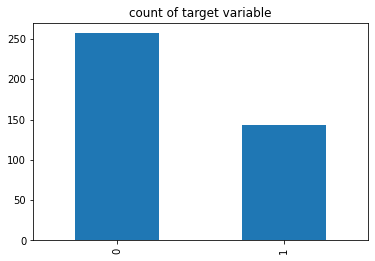

In [ ]:
count = df.Purchased.value_counts()
count.plot(kind='bar', title="count of target variable")

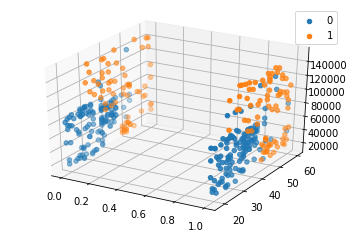

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for s in df.Purchased.unique():
    ax.scatter(df.Gender[df.Purchased==s],df.Age[df.Purchased==s],df['EstimatedSalary'][df.Purchased==s],label=s)
    
ax.legend()

**Splitting the dataset into the Training set and Test set**

In [ ]:
X= df[['Gender', 'Age', 'EstimatedSalary']].values
y= df["Purchased"].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Fitting SVM to the Training set**

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(X_train, y_train) 

SVC()

**Predicting the Test set results**

In [ ]:
y_pred= clf.predict(X_test)

In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
115,0,0
116,1,1
117,0,0
118,0,0


**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import accuracy_score, plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score

In [ ]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[72,  3],
       [ 6, 39]])

In [ ]:
#f1 score
f1_score(y_test,y_pred)


0.896551724137931

In [ ]:
#accuracy
accuracy_score(y_test,y_pred)

0.925

In [ ]:
#auroc score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.9133333333333333

**Visualising the Training set results**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


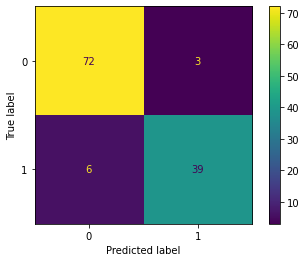

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()